In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/kmeans-dataset/ex7_X.npy
/kaggle/input/ex2-data/bird_small.png


In [2]:
def plot_progress(X,idx, centroids, new_centroids):
    plt.scatter(X[:,0], X[:, 1], c =idx) # plotting the data points #color data points according to their cluster 'idx'
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='k', linewidths=3) # plotting the centroids
    for j in range(centroids.shape[0]):
        plt.plot([centroids[j,0], new_centroids[j,0]], [centroids[j,1], new_centroids[j,1]], "-k", linewidth=1)   
def pick_initial_centroids(X,K):
    random_indices = np.random.permutation(X.shape[0]) #shuffling the numbers from 0 to m 
    centroids = X[random_indices[:K]] # index X using the first K elements in shuffled numbers
    return centroids

def find_closest_centroids(X, centroids):
    m,n = X.shape
    k = centroids.shape[0]
    C = np.zeros(m)
    for i in range(m):
        min_dist = 10000
        best_centroid = 0
        for j in range(k):
            dist = sum((X[i] - centroids[j])**2)
            if min_dist > dist:
                min_dist = dist
                best_centroid = j
        C[i] = best_centroid
    return C

def compute_centroids(X, C, K):
    m,n = X.shape
    centroids = np.zeros((K,n))
    for k in range(K):
        idx = C==k
        X_cluster = X[idx]
        centroids[k] = sum(X_cluster)/len(X_cluster)
    return centroids

def runKmeans(initial_centroids, X, max_itr, plot=False):
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    itr = 0
    while itr < max_itr:
        C = find_closest_centroids(X,centroids)
        new_centroids = compute_centroids(X,C,K)
        if plot:
            plot_progress(X,C, centroids, new_centroids)
        centroids = new_centroids
        itr += 1
    plt.show()
    return C, new_centroids

def compute_J (X, C, centroids):
    m,n = X.shape
    error = 0
    for i in range(m):
        cluster = int(C[i])
        error += sum((X[i] - centroids[cluster])**2)
    error /=m
    return error

def best_random_initial_initization(X,K):
    min_cost = 9999999
    n = X.shape[1]
    best_centroids = np.zeros((K,n))
    for i in range(10):
        initial_centroids = pick_initial_centroids(X,K)
        C, centroids = runKmeans(initial_centroids, X, 10)
        cost = compute_J(X,C, centroids)
        print(cost)
        if cost < min_cost:
            min_cost = cost
            best_centroids = initial_centroids
    return best_centroids

In [3]:
X = np.load('../input/kmeans-dataset/ex7_X.npy')
print(f"First five elements in dataset: \n{X[:5]}")
print(f"Shape of X: {X.shape}")

First five elements in dataset: 
[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
Shape of X: (300, 2)


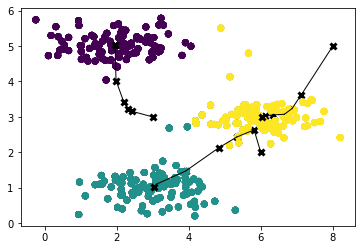

In [4]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = initial_centroids.shape[0]
max_itr = 10
idx, centroids = runKmeans(initial_centroids, X, max_itr, plot=True)


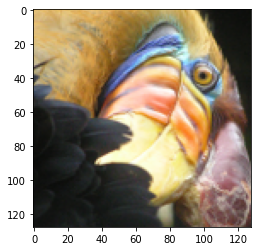

In [5]:
img = plt.imread('../input/ex2-data/bird_small.png')
plt.imshow(img)

In [6]:
print(f"the shape of the image:{img.shape}")

the shape of the image:(128, 128, 3)


1.411044685271314e-07
1.3194406806848424e-07
1.3448459091992807e-07
1.3569592971875998e-07
1.2616962264478896e-07
1.2899097306105702e-07
1.3079214928253537e-07
1.443220580074342e-07
1.2935580404187401e-07
1.222254583055704e-07


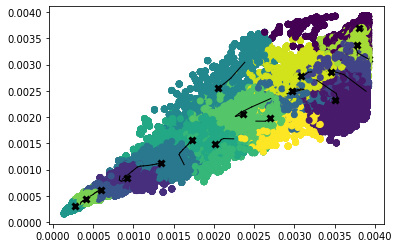

In [7]:
img /= 255
reshaped_img = np.reshape(img, (img.shape[0]*img.shape[1],3))
initial_centroids = best_random_initial_initization(reshaped_img, K=16)
C,new_centorids = runKmeans(initial_centroids, reshaped_img,10, plot=True)

1.222254583055704e-07


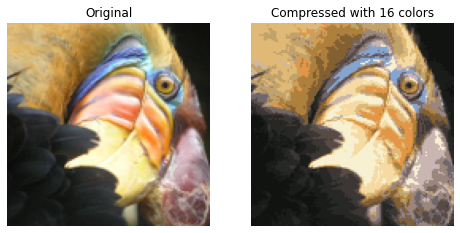

In [8]:
print(compute_J(reshaped_img, C, new_centorids))

compressed_img = new_centorids[np.array(C, dtype=int)]
compressed_img = np.reshape(compressed_img, img.shape)

fig, ax = plt.subplots(1,2,figsize=(8,8))
plt.axis('off')
ax[0].imshow(img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(compressed_img*255)
ax[1].set_title(f'Compressed with {16} colors')
ax[1].set_axis_off()